# What is a Function Transformer?
A Function Transformer in machine learning (ML) is a technique used to apply mathematical transformations to features in a dataset. It allows users to apply a custom or predefined function (like log, square root, reciprocal, etc.) to transform the input data.

In scikit-learn, the FunctionTransformer class provides a way to apply these transformations to features in a pipeline-friendly manner.

## Why Do We Need Function Transformation?
### ⭐Handle Skewed Data:
Many ML algorithms assume that features are normally distributed. Transformations help correct skewness and make the data more Gaussian-like.

---
### Skewness
Skewness tells us how "tilted" or "asymmetrical" a dataset is when plotted on a graph. It shows if the data is more spread out on one side than the other.

- Positive Skew (Right-Skewed) 📈   
The tail is longer on the right (higher values).
Example: Income distribution (most people earn low, few earn very high).

- Negative Skew (Left-Skewed) 📉   
The tail is longer on the left (lower values).
Example: Age at retirement (most people retire at older ages, few at younger ages).

- No Skew (Symmetric) 🔄   
Data is evenly spread on both sides (like a bell curve).
Example: Height of people in a large population.

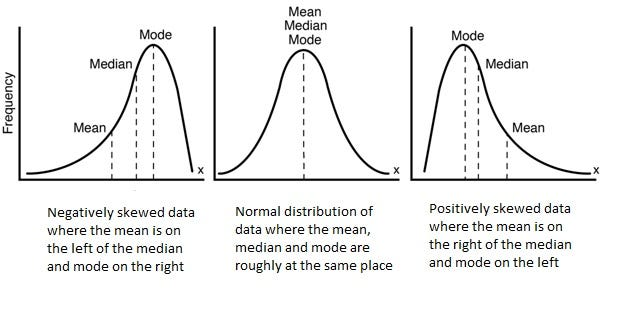
---

### ⭐Why Does Skewness Matter in ML?
Many machine learning models (like Linear Regression) assume normal (symmetrical) data.
If data is skewed, log or power transformations can make it more normal-like, improving model accuracy.

### ⭐Improve Model Performance:
Some models (e.g., linear regression, logistic regression) perform better when relationships between variables are more linear.
## ⭐Stabilize Variance (Homoscedasticity):
Helps reduce heteroscedasticity (unequal variance) in datasets, which improves predictions.

# Function Transformer
### - Log transformation
### - Reciprocal transformation
### - Square root transformation
### - Custom transformations

# Power Transformer
### - Box-Cox
### - Yeo-Johnson

# Quantile Transformer

### **How to Check if Data is Normal?** 📊  
To determine if your data follows a **normal distribution**, you can use **visualizations** and **statistical tests**.  

---

### **1️⃣ Visual Methods**  
These help you **see** if the data is normal.

#### **📈 Histogram**
- A normal distribution looks like a **bell curve** (symmetric).  
- If the histogram is **skewed left or right**, the data may not be normal.  
```python
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data, bins=30, kde=True)  # kde=True adds a smooth curve
plt.show()
```

#### **📊 Q-Q Plot (Quantile-Quantile Plot)**
- If data is normal, points will **align along a straight line**.  
```python
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(data, dist="norm", plot=plt)
plt.show()
```
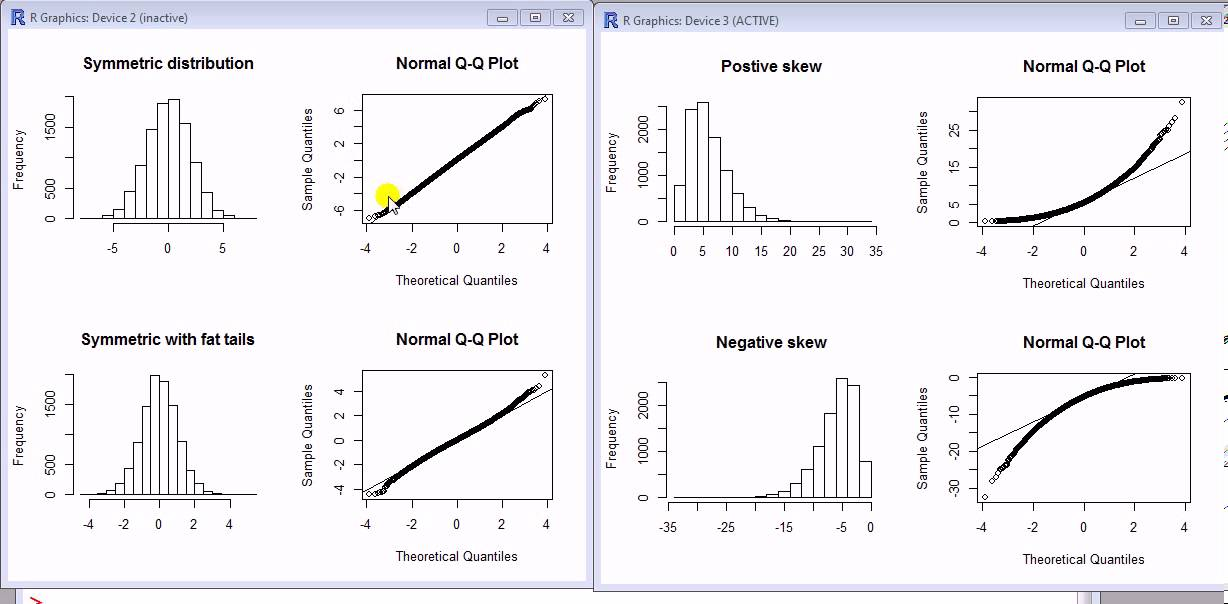

---

### **2️⃣ Statistical Tests**  
These provide **numerical evidence** of normality.

#### **📌 Shapiro-Wilk Test** (Recommended for small datasets)
- **p-value > 0.05** → Data is **normal** ✅  
- **p-value ≤ 0.05** → Data is **not normal** ❌  
```python
from scipy.stats import shapiro

stat, p = shapiro(data)
print(f"Shapiro-Wilk Test: p-value = {p}")
```

#### **📌 Kolmogorov-Smirnov Test**
- Checks how well data matches a normal distribution.
```python
from scipy.stats import kstest

stat, p = kstest(data, 'norm')
print(f"Kolmogorov-Smirnov Test: p-value = {p}")
```

#### **📌 Anderson-Darling Test**
- Gives a stronger indication of normality.
```python
from scipy.stats import anderson

result = anderson(data)
print(f"Anderson-Darling Test: {result.statistic}, Critical Values: {result.critical_values}")
```

---

### **3️⃣ Skewness & Kurtosis**
- **Skewness ≈ 0** → Data is symmetric  
- **Kurtosis ≈ 3** → Normal distribution  
```python
from scipy.stats import skew, kurtosis

print(f"Skewness: {skew(data)}")
print(f"Kurtosis: {kurtosis(data)}")
```

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('loan_default_risk_dataset.csv')

In [3]:
df.sample(10)

,Retirement_Age,Debt_Amount,Monthly_Savings,Loan_Default_Risk
2,58.5,19865.75,2434.80,1
221,83.7,15553.36,2704.67,0
27,61.2,20952.12,1937.11,1
56,73.4,7925.05,2006.96,0
104,66.6,4721.69,1221.69,1
292,70.9,14397.01,2533.34,0
134,74.2,49159.65,2514.58,1
192,62.9,8891.42,2135.79,0
235,58.7,8577.33,2117.11,1
209,26.5,2989.50,1552.70,1


In [4]:
df.isnull().sum()

Retirement_Age       0
Debt_Amount          1
Monthly_Savings      2
Loan_Default_Risk    0
dtype: int64

In [5]:
df[['Debt_Amount', 'Monthly_Savings']] = df[['Debt_Amount', 'Monthly_Savings']].apply(lambda x: x.fillna(x.mean()))

In [6]:
df.isnull().sum()

Retirement_Age       0
Debt_Amount          0
Monthly_Savings      0
Loan_Default_Risk    0
dtype: int64

In [7]:
df.sample(5)

,Retirement_Age,Debt_Amount,Monthly_Savings,Loan_Default_Risk
27,61.2,20952.12,1937.11,1
6,49.2,37541.34,1613.11,1
196,73.8,2333.92,1980.22,0
11,69.7,30288.77,1972.21,1
214,68.2,4055.68,2515.92,0


In [8]:
X = df.iloc[:,:3]
y = df.iloc[:,-1]

In [9]:
X

,Retirement_Age,Debt_Amount,Monthly_Savings
0,60.0,2996.52,2378.49
1,66.4,4137.23,1538.92
2,58.5,19865.75,2434.80
3,49.8,16855.70,2677.82
4,67.3,7902.37,2206.72
...,...,...,...
295,71.9,4393.93,2324.35
296,56.0,5861.44,1916.44
297,61.9,2503.60,2073.36
298,56.9,4754.51,2603.25


In [10]:
y

0      0
1      1
2      1
3      1
4      0
      ..
295    0
296    1
297    0
298    0
299    1
Name: Loan_Default_Risk, Length: 300, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
X_test.head()

,Retirement_Age,Debt_Amount,Monthly_Savings
203,54.5,15923.69,1768.86
266,48.7,702.22,2142.93
152,71.8,2482.77,1512.06
9,59.6,6357.36,2748.02
233,71.5,1894.63,1616.10


In [13]:
X_train.head()

,Retirement_Age,Debt_Amount,Monthly_Savings
232,64.5,7485.36,1497.93
59,55.2,3002.87,1927.82
6,49.2,37541.34,1613.11
185,57.9,1470.41,2540.39
173,61.6,41783.18,2486.28


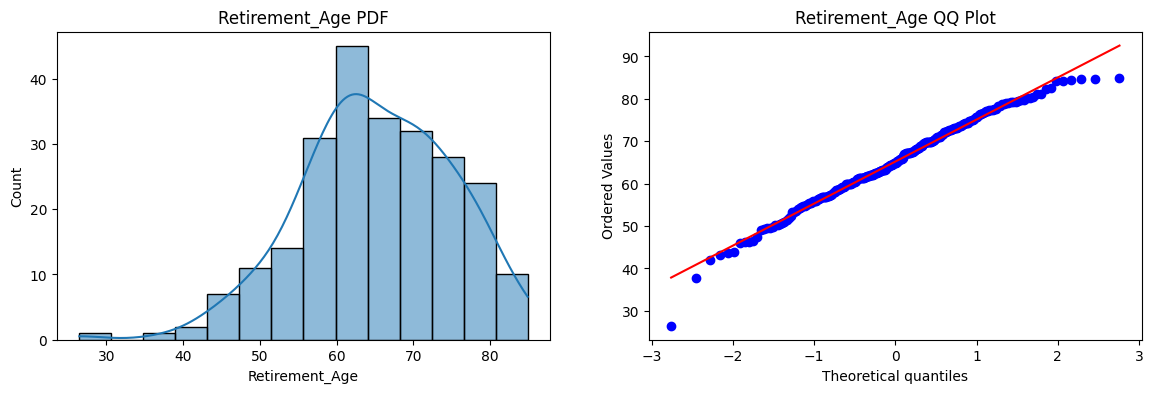

In [25]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Retirement_Age'], kde=True)
plt.title('Retirement_Age PDF')

plt.subplot(122)
stats.probplot(X_train['Retirement_Age'], dist="norm", plot=plt)
plt.title('Retirement_Age QQ Plot')

plt.show()

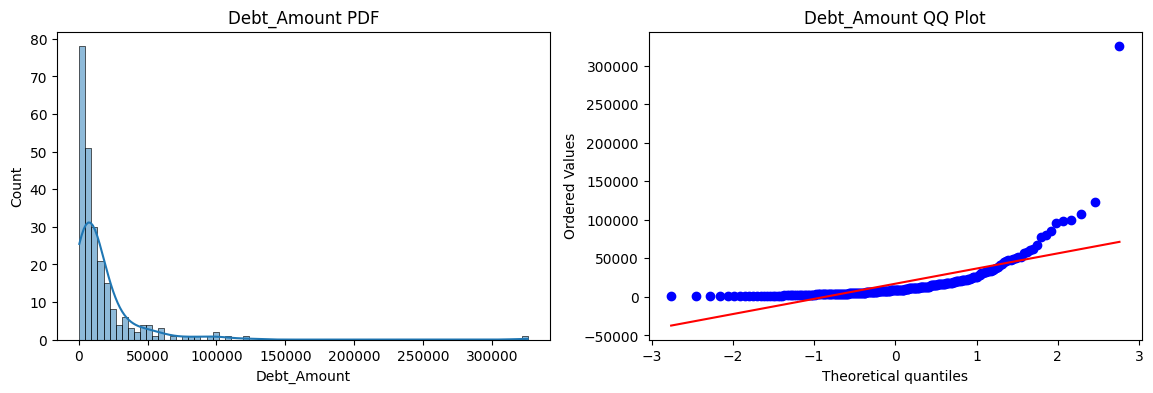

In [26]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Debt_Amount'], kde=True)
plt.title('Debt_Amount PDF')

plt.subplot(122)
stats.probplot(X_train['Debt_Amount'], dist="norm", plot=plt)
plt.title('Debt_Amount QQ Plot')

plt.show()

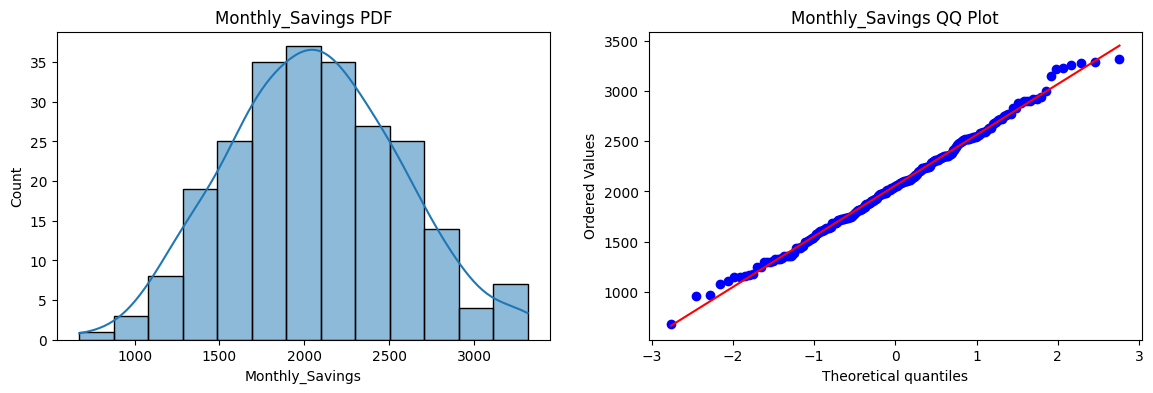

In [27]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Monthly_Savings'], kde=True)
plt.title('Monthly_Savings PDF')

plt.subplot(122)
stats.probplot(X_train['Monthly_Savings'], dist="norm", plot=plt)
plt.title('Monthly_Savings QQ Plot')

plt.show()

In [28]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [29]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
    
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred)*100)
print("Accuracy DT",accuracy_score(y_test,y_pred1)*100)

Accuracy LR 98.33333333333333
Accuracy DT 88.33333333333333


# Log Transformer to all columns

In [30]:
trf = FunctionTransformer(func=np.log1p)

In [31]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [32]:
X_train_transformed.head()

,Retirement_Age,Debt_Amount,Monthly_Savings
232,4.182050,8.920838,7.312507
59,4.028917,8.007657,7.564664
6,3.916015,10.533225,7.386539
185,4.075841,7.293976,7.840466
173,4.136765,10.640273,7.818945


In [33]:
X_test_transformed.head()

,Retirement_Age,Debt_Amount,Monthly_Savings
203,4.016383,9.675626,7.478656
266,3.906005,6.555670,7.670396
152,4.287716,7.817533,7.321889
9,4.104295,8.757526,7.919000
233,4.283587,7.547307,7.388390


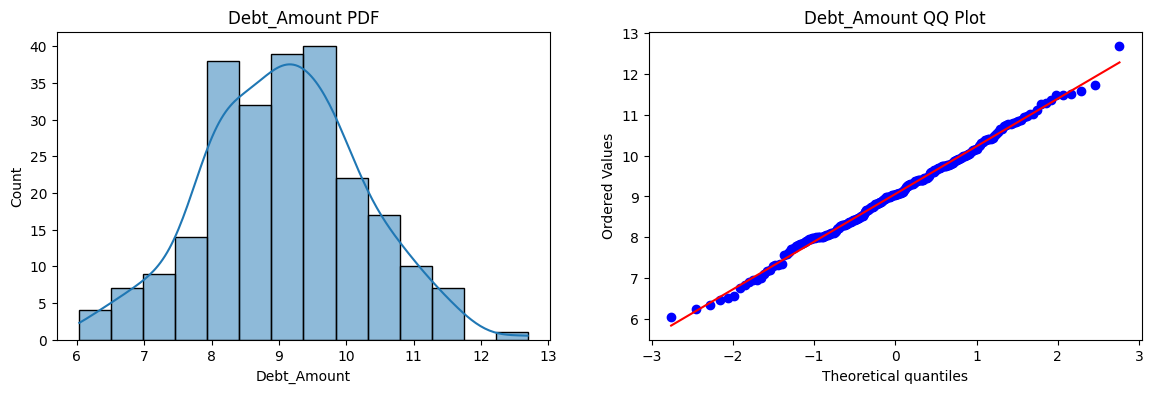

In [34]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train_transformed['Debt_Amount'], kde=True)
plt.title('Debt_Amount PDF')

plt.subplot(122)
stats.probplot(X_train_transformed['Debt_Amount'], dist="norm", plot=plt)
plt.title('Debt_Amount QQ Plot')

plt.show()

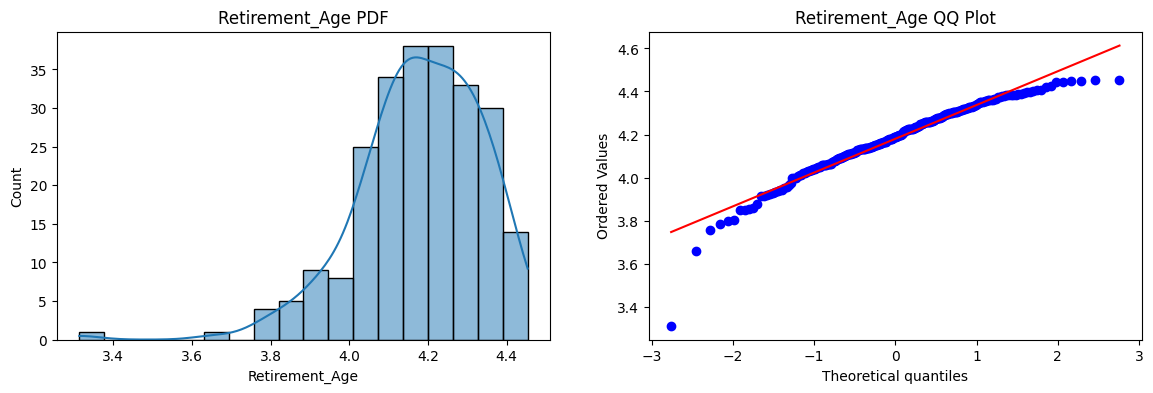

In [35]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train_transformed['Retirement_Age'], kde=True)
plt.title('Retirement_Age PDF')

plt.subplot(122)
stats.probplot(X_train_transformed['Retirement_Age'], dist="norm", plot=plt)
plt.title('Retirement_Age QQ Plot')

plt.show()

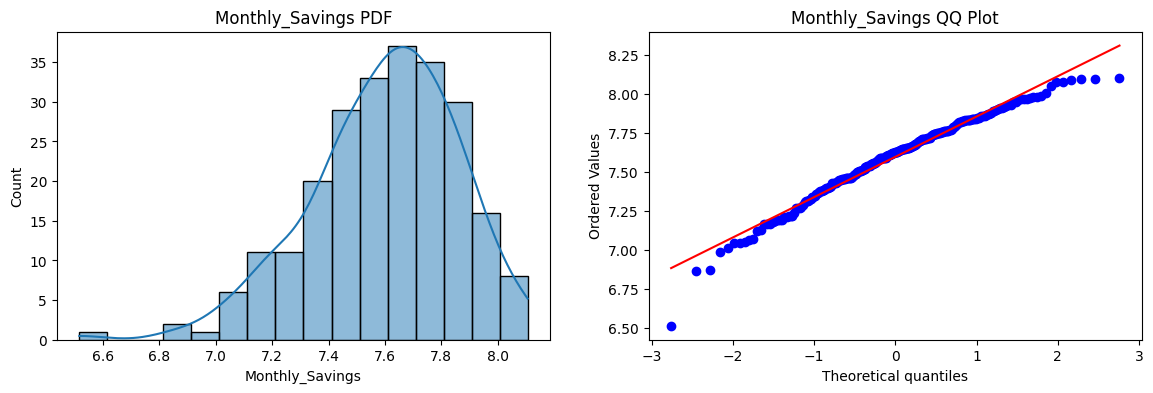

In [36]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train_transformed['Monthly_Savings'], kde=True)
plt.title('Monthly_Savings PDF')

plt.subplot(122)
stats.probplot(X_train_transformed['Monthly_Savings'], dist="norm", plot=plt)
plt.title('Monthly_Savings QQ Plot')

plt.show()

In [38]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred)*100)
print("Accuracy DT",accuracy_score(y_test,y_pred1)*100)

Accuracy LR 85.0
Accuracy DT 86.66666666666667


In [114]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.9033333333333335
DT 0.89


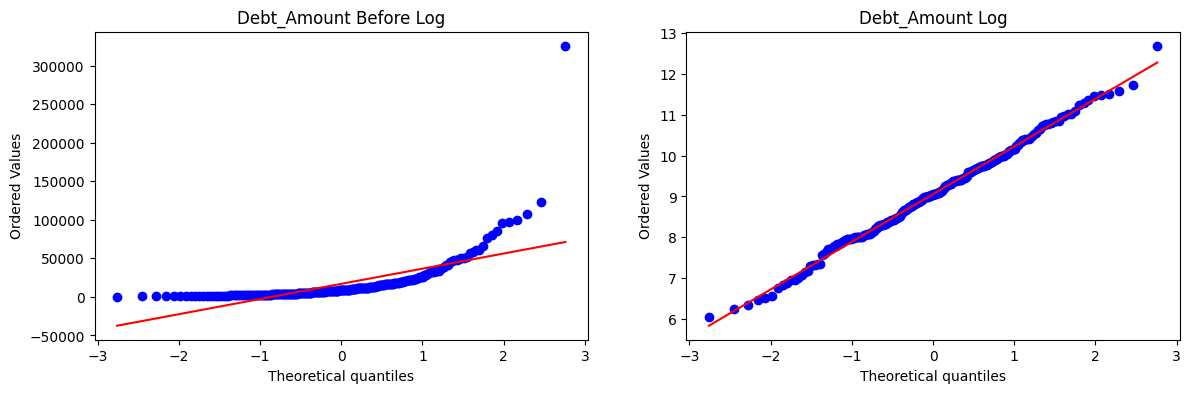

In [36]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Debt_Amount'], dist="norm", plot=plt)
plt.title('Debt_Amount Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Debt_Amount'], dist="norm", plot=plt)
plt.title('Debt_Amount Log')

plt.show()

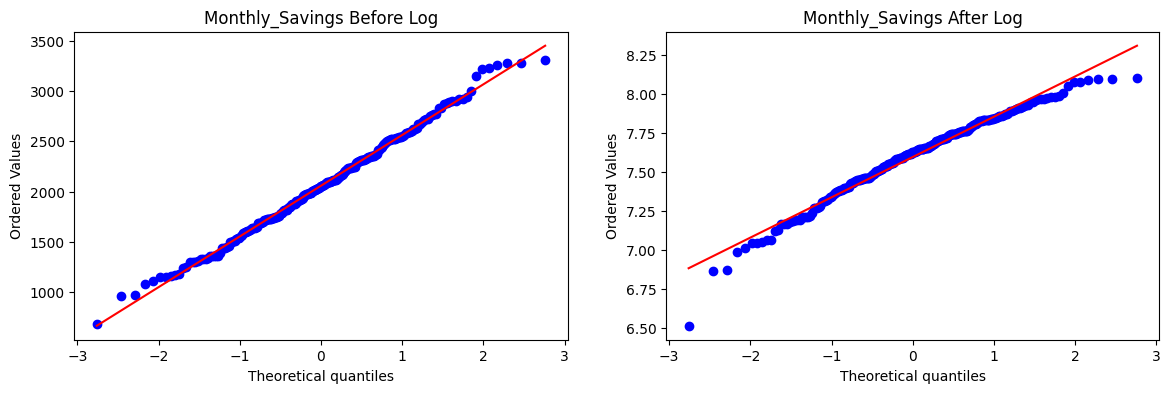

In [57]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Monthly_Savings'], dist="norm", plot=plt)
plt.title('Monthly_Savings Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Monthly_Savings'], dist="norm", plot=plt)
plt.title('Monthly_Savings After Log')

plt.show()

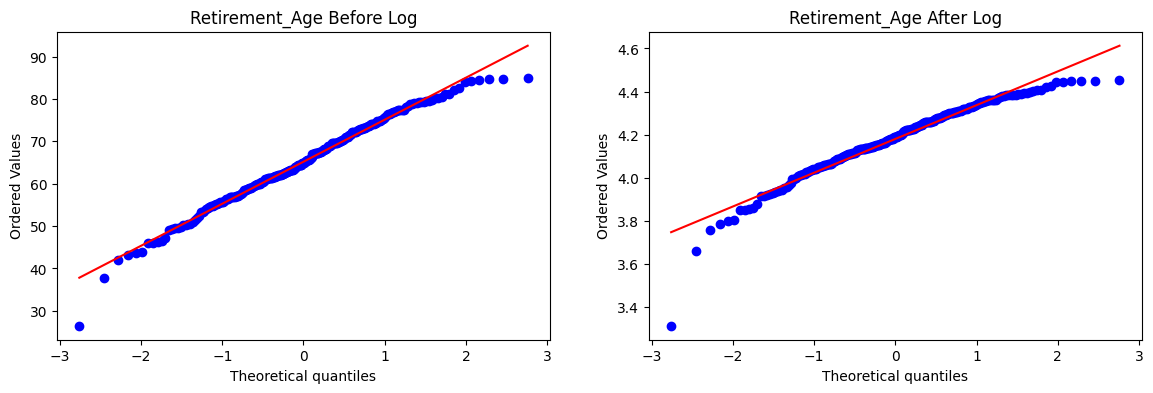

In [58]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Retirement_Age'], dist="norm", plot=plt)
plt.title('Retirement_Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Retirement_Age'], dist="norm", plot=plt)
plt.title('Retirement_Age After Log')

plt.show()

# Log Transformer to only Debt Amount Column

In [104]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Debt_Amount'])], remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

# Explicitly set column names in the correct order
new_columns = ['Debt_Amount'] + [col for col in X_train.columns if col != 'Debt_Amount']

In [105]:
X_train_transformed2_df = pd.DataFrame(X_train_transformed2, columns=new_columns)
X_test_transformed2_df = pd.DataFrame(X_test_transformed2, columns=new_columns)

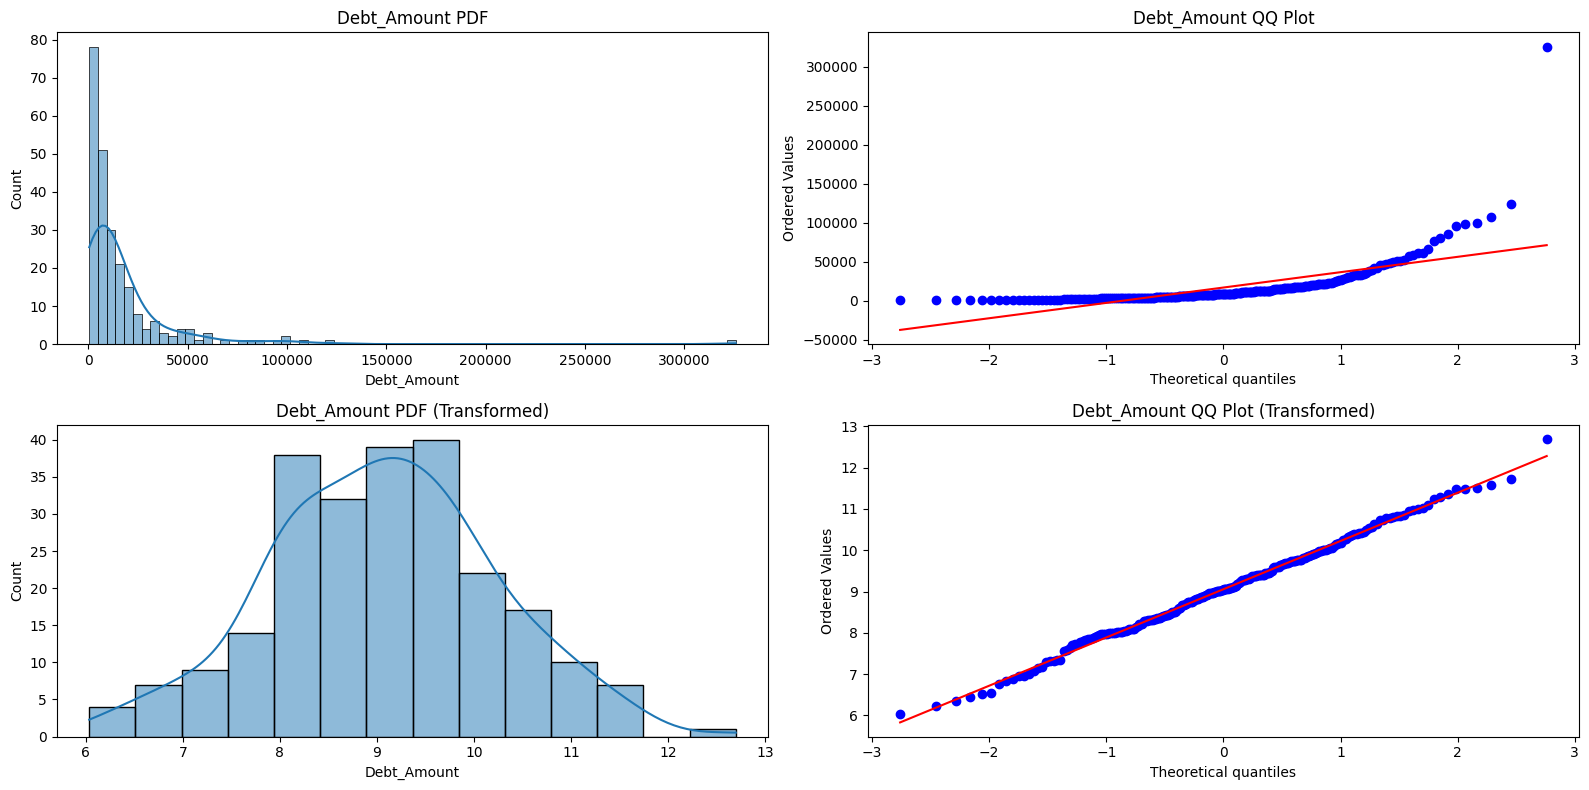

In [121]:
plt.figure(figsize=(16,8))

# Debt_Amount PDF and QQ Plot (Before Transformation)
plt.subplot(221)
sns.histplot(X_train['Debt_Amount'], kde=True)
plt.title('Debt_Amount PDF')

plt.subplot(222)
stats.probplot(X_train['Debt_Amount'], dist="norm", plot=plt)
plt.title('Debt_Amount QQ Plot')

# Debt_Amount PDF and QQ Plot (After Transformation)
plt.subplot(223)
sns.histplot(X_train_transformed2_df['Debt_Amount'], kde=True)
plt.title('Debt_Amount PDF (Transformed)')

plt.subplot(224)
stats.probplot(X_train_transformed2_df['Debt_Amount'], dist="norm", plot=plt)
plt.title('Debt_Amount QQ Plot (Transformed)')

plt.tight_layout()
plt.show()

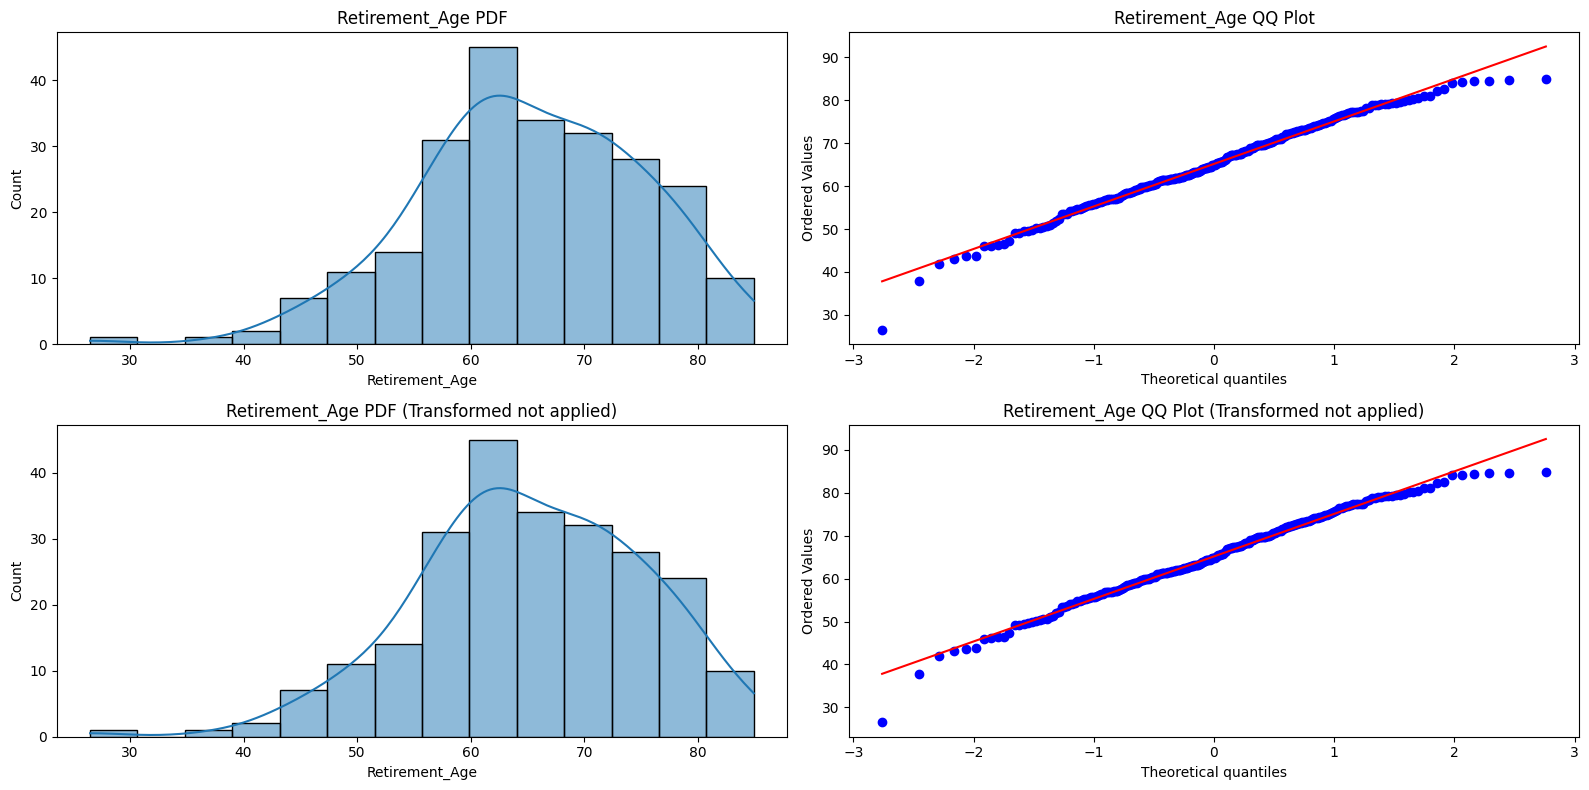

In [109]:
plt.figure(figsize=(16,8))

# Retirement_Age PDF and QQ Plot (Before Transformation)
plt.subplot(221)
sns.histplot(X_train['Retirement_Age'], kde=True)
plt.title('Retirement_Age PDF')

plt.subplot(222)
stats.probplot(X_train['Retirement_Age'], dist="norm", plot=plt)
plt.title('Retirement_Age QQ Plot')

# Retirement_Age PDF and QQ Plot (After Transformation)
plt.subplot(223)
sns.histplot(X_train_transformed2_df['Retirement_Age'], kde=True)
plt.title('Retirement_Age PDF (Transformed not applied)')

plt.subplot(224)
stats.probplot(X_train_transformed2_df['Retirement_Age'], dist="norm", plot=plt)
plt.title('Retirement_Age QQ Plot (Transformed not applied)')

plt.tight_layout()
plt.show()

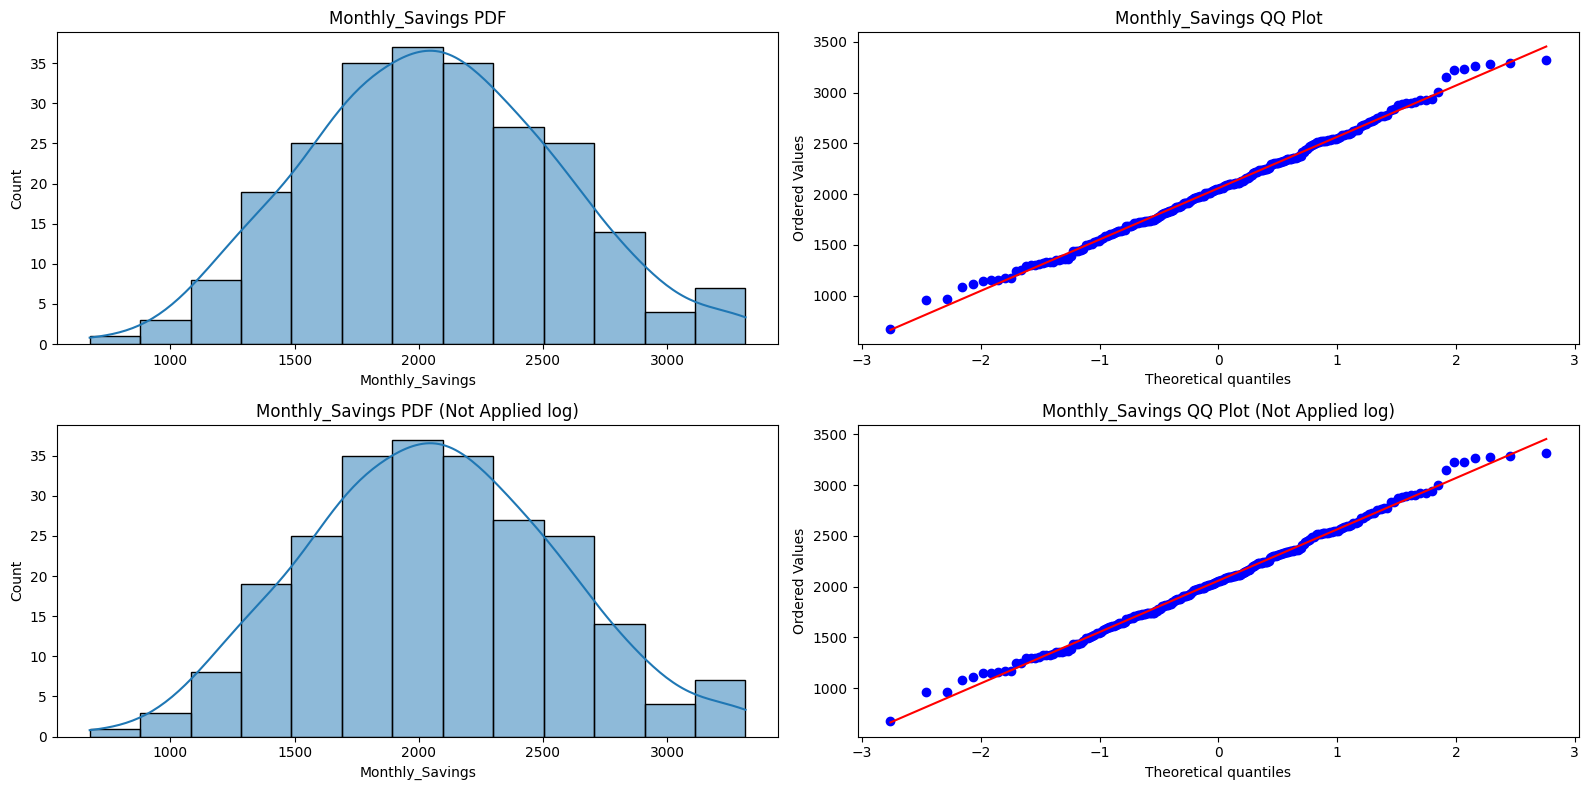

In [129]:
plt.figure(figsize=(16,8))

# Monthly_Savings PDF and QQ Plot (Before Transformation)
plt.subplot(221)
sns.histplot(X_train['Monthly_Savings'], kde=True)
plt.title('Monthly_Savings PDF')

plt.subplot(222)
stats.probplot(X_train['Monthly_Savings'], dist="norm", plot=plt)
plt.title('Monthly_Savings QQ Plot')

# Monthly_Savings PDF and QQ Plot (After Transformation)
plt.subplot(223)
sns.histplot(X_train_transformed2_df['Monthly_Savings'], kde=True)
plt.title('Monthly_Savings PDF (Not Applied log)')

plt.subplot(224)
stats.probplot(X_train_transformed2_df['Monthly_Savings'], dist="norm", plot=plt)
plt.title('Monthly_Savings QQ Plot (Not Applied log)')

plt.tight_layout()
plt.show()


In [116]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.9166666666666666
Accuracy DT 0.8833333333333333


In [117]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.9233333333333335
DT 0.8866666666666667


# Apply Log Transformer to column Debt_Amount and Square Transformer to Retirement_Age

In [119]:
trf3 = ColumnTransformer([
    ('log', FunctionTransformer(np.log1p), ['Debt_Amount']),
    ('square', FunctionTransformer(lambda x: x ** 2), ['Retirement_Age'])
], remainder='passthrough')

X_train_transformed3 = trf3.fit_transform(X_train)
X_test_transformed3 = trf3.transform(X_test)

In [124]:
# Convert to DataFrame to retain column names
X_train_transformed3_df = pd.DataFrame(X_train_transformed3, columns=X_train.columns)
X_test_transformed3_df = pd.DataFrame(X_test_transformed3, columns=X_test.columns)

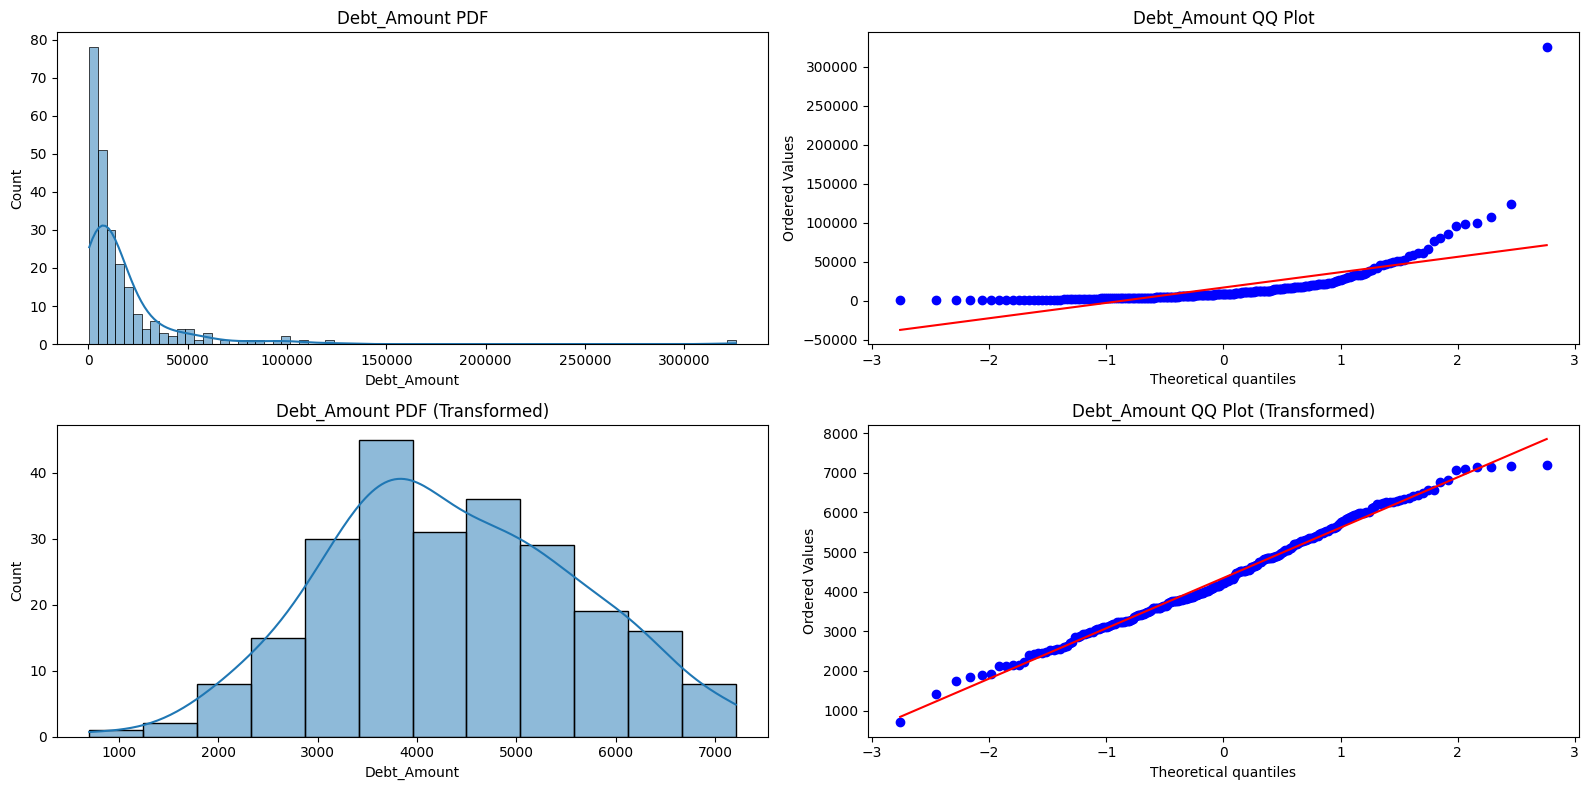

In [125]:
plt.figure(figsize=(16,8))

# Debt_Amount PDF and QQ Plot (Before Transformation)
plt.subplot(221)
sns.histplot(X_train['Debt_Amount'], kde=True)
plt.title('Debt_Amount PDF')

plt.subplot(222)
stats.probplot(X_train['Debt_Amount'], dist="norm", plot=plt)
plt.title('Debt_Amount QQ Plot')

# Debt_Amount PDF and QQ Plot (After Transformation)
plt.subplot(223)
sns.histplot(X_train_transformed3_df['Debt_Amount'], kde=True)
plt.title('Debt_Amount PDF (Transformed)')

plt.subplot(224)
stats.probplot(X_train_transformed3_df['Debt_Amount'], dist="norm", plot=plt)
plt.title('Debt_Amount QQ Plot (Transformed)')

plt.tight_layout()
plt.show()

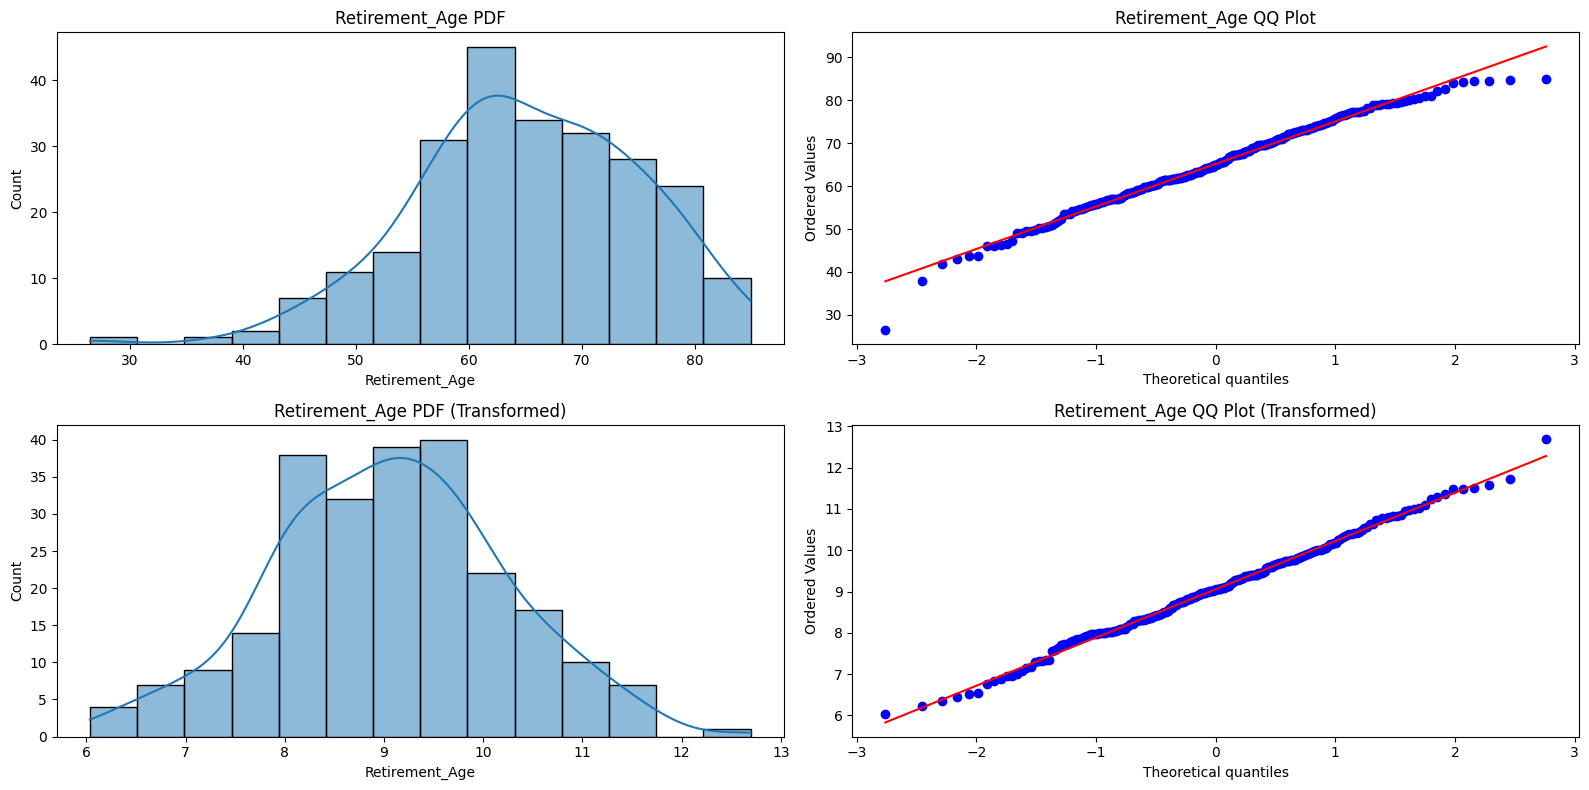

In [127]:
plt.figure(figsize=(16,8))

# Retirement_Age PDF and QQ Plot (Before Transformation)
plt.subplot(221)
sns.histplot(X_train['Retirement_Age'], kde=True)
plt.title('Retirement_Age PDF')

plt.subplot(222)
stats.probplot(X_train['Retirement_Age'], dist="norm", plot=plt)
plt.title('Retirement_Age QQ Plot')

# Retirement_Age PDF and QQ Plot (After Transformation)
plt.subplot(223)
sns.histplot(X_train_transformed3_df['Retirement_Age'], kde=True)
plt.title('Retirement_Age PDF (Transformed)')

plt.subplot(224)
stats.probplot(X_train_transformed3_df['Retirement_Age'], dist="norm", plot=plt)
plt.title('Retirement_Age QQ Plot (Transformed)')

plt.tight_layout()
plt.show()

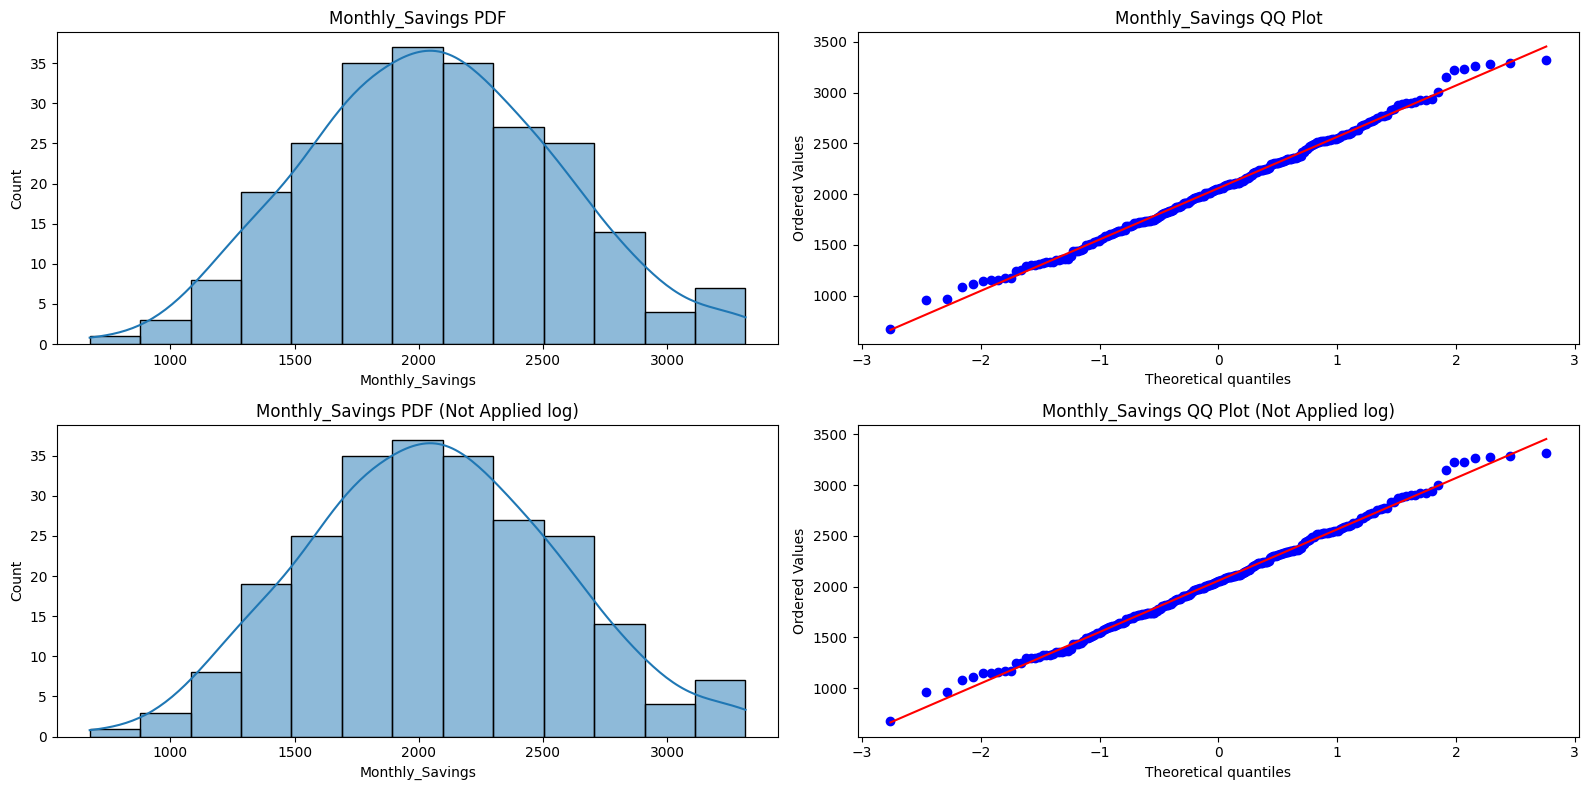

In [130]:
plt.figure(figsize=(16,8))

# Monthly_Savings PDF and QQ Plot (Before Transformation)
plt.subplot(221)
sns.histplot(X_train['Monthly_Savings'], kde=True)
plt.title('Monthly_Savings PDF')

plt.subplot(222)
stats.probplot(X_train['Monthly_Savings'], dist="norm", plot=plt)
plt.title('Monthly_Savings QQ Plot')

# Monthly_Savings PDF and QQ Plot (After Transformation)
plt.subplot(223)
sns.histplot(X_train_transformed3_df['Monthly_Savings'], kde=True)
plt.title('Monthly_Savings PDF (Not Applied log)')

plt.subplot(224)
stats.probplot(X_train_transformed3_df['Monthly_Savings'], dist="norm", plot=plt)
plt.title('Monthly_Savings QQ Plot (Not Applied log)')

plt.tight_layout()
plt.show()

In [131]:
clf = LogisticRegression()
clf3 = DecisionTreeClassifier()

clf.fit(X_train_transformed3,y_train)
clf3.fit(X_train_transformed3,y_train)
    
y_pred = clf.predict(X_test_transformed3)
y_pred3 = clf3.predict(X_test_transformed3)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred3))

Accuracy LR 0.9166666666666666
Accuracy DT 0.9
